# COGS 188 Lab 5 Part 1: Markov Decision Processes (MDPs) and Q-Learning

Markov Decision Processes (MDPs) provide a mathematical framework for modeling decision-making in situations where outcomes are partly random and partly under the control of a decision maker. MDPs are widely used in automated decision-making and machine learning, particularly in the field of reinforcement learning.

## Conceptual Overview

An MDP is defined by:
- A set of states $S$
- A set of actions $A$
- A transition function $T(s, a, s')$ which is the probability of transitioning to state $s'$ from state $s$ by taking action $a$
- A reward function $R(s, a, s')$ which is the reward received after transitioning from state $s$ to state $s'$, due to action $a$
- A discount factor $\gamma$, which represents the difference in importance between future rewards and present rewards

The goal in an MDP is to find a policy $\pi$, which is a function from states to actions, $\pi: S \rightarrow A$, that maximizes the cumulative reward.

## Mathematical Formulation

The value of being in a state $s$ under a policy $\pi$, denoted $V^\pi(s)$, is the expected return starting from $s$ and following $\pi$ thereafter. Mathematically, this can be represented as:

$$V^\pi(s) = \mathbb{E} \left[ \sum_{k=0}^\infty \gamma^k R_{t+k+1} \mid S_t = s, \pi \right]$$

where $R_{t+k+1}$ is the reward received at time $t+k+1$. The function $V^\pi(s)$ is called the **state-value function** for policy $\pi$.

### Bellman Equation

For a policy $\pi$, the state-value function satisfies the Bellman equation:

$$V^\pi(s) = \sum_{a \in A} \pi(a \mid s) \sum_{s' \in S} T(s, a, s') \left( R(s, a, s') + \gamma V^\pi(s') \right)$$

This equation states that the value of a state under a policy is the expected return for selecting an action according to the policy, performing the action, receiving the immediate reward, and then discounted future rewards.

## Optimal Policies and Value Functions

The optimal state-value function $V^*(s)$ gives us the maximum value that can be obtained from state $s$ under any policy. Similarly, we define an optimal action-value function, $Q^*(s, a)$, which measures the value of taking an action $a$ in state $s$ and then following the optimal policy thereafter.

$$Q^*(s, a) = \sum_{s' \in S} T(s, a, s') \left( R(s, a, s') + \gamma V^*(s') \right)$$

## How do MDPs differ from Multi-Armed Bandits?

1. **Complexity of Environment**:
   - **Bandits**: No state transitions or effects of an action on future rewards.
   - **MDPs**: State transitions are crucial, and actions affect future states and rewards.

2. **Scope of Decision Making**:
   - **Bandits**: Decisions are independent of each other.
   - **MDPs**: Decisions are based on the current state and have long-term consequences.

3. **Policy Development**:
   - **Bandits**: The policy is simply about choosing the arm with the highest expected reward.
   - **MDPs**: Policies are mappings from states to actions, aiming to maximize cumulative future rewards.

## Task 1: Implementation of a Simple Toy MDP

In this task, you will implement and analyze different policies for a simple Markov Decision Process (MDP). This MDP represents an agent navigating a linear world with five states. Your task is to understand how different policies influence the state transitions and rewards in this MDP environment.

### Environment Setup
Below is the setup for our simple MDP environment. Our environment is a linear world with 5 states, where an agent can move left, stay, or move right. We will define the states, actions, and the basic structure of our MDP functions. You can imagine this as a set of 5 blocks in a line, numbered from 1 to 5. The agent starts at block 1 and can move left, stay, or move right. If the agent tries to move left from block 1, it stays in the same block. Similarly, if the agent tries to move right from block 5, it stays in the same block.

In [1]:
# this will load the autoreload extension
# which automatically reloads the changes in the code
# which means that you can modify the code and run it without the need to reload the notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Define the states and possible actions
states = np.arange(1, 6)  # States 1 through 5
actions = ["left", "stay", "right"]  # Actions available in each state

print("States:", states)
print("Actions:", actions)

States: [1 2 3 4 5]
Actions: ['left', 'stay', 'right']


Remember that each state is represented by an integer from 1 to 5, and each action is represented by a string: 'left', 'stay', or 'right'.

### Transition Function
Let's start by defining the transition function. This function determines the next state based on the current state and action. It should handle boundaries by preventing the agent from moving beyond the state limits. As mentioned earlier, if the agent tries to move left from state 1 or right from state 5, it stays in the same state.

### Task: Implement the Transition Function
Complete the `transition` function below.

In [2]:
from src.mdp import transition

# Test the transition function
print("Transition from state 1 with 'right':", transition(1, "right"))
print("Transition from state 5 with 'left':", transition(5, "left"))
print("Transition from state 1 with 'left':", transition(1, "left"))

Transition from state 1 with 'right': 2
Transition from state 5 with 'left': 4
Transition from state 1 with 'left': 1


### Reward Function
Next, define the reward function, which returns a reward based on the current state and action.

The reward function ultimately depends on what you want the agent to achieve. Let's say we want the agent to reach the rightmost state (state 5) as quickly as possible. One simple example of a reward function could be:

- If the agent is in state 4 and moves right, it receives a reward of +10 (because it reaches the goal).
- In any other case, the agent receives a reward of -1.

### Task: Implement the Reward Function
Complete the `reward` function as described.


In [3]:
from src.mdp import reward

# Test the reward function
print("Reward for moving right in state 4:", reward(5, "right"))
print("Reward for moving left in state 1:", reward(1, "left"))

Reward for moving right in state 4: -1
Reward for moving left in state 1: -1


### Policy Implementation
Now, define a policy that the agent will follow. Recall that a policy is a function that maps states to actions.

Start with a simple policy that always moves right.

### Task: Implement the Always Right Policy
Fill in the `always_right_policy` function.

In [4]:
from src.mdp import always_right_policy

# Test the policy
for state in range(5):
    action = always_right_policy(state)
    print(f"Action chosen by always_right_policy in state {state}:", action)

Action chosen by always_right_policy in state 0: right
Action chosen by always_right_policy in state 1: right
Action chosen by always_right_policy in state 2: right
Action chosen by always_right_policy in state 3: right
Action chosen by always_right_policy in state 4: right


### Task: Implement a more random policy

Policies can also be stochastic, meaning that they can choose actions randomly based on a certain probability distribution. Furthermore, policies can be time-dependent, meaning that the action chosen can depend on the current time step.

Fill in the `my_policy` function. If the agent is in the leftmost state, it should move right with a probability of 0.5 and stay with a probability of 0.5. If the agent is in the rightmost state, it should move left with a probability of 0.5 and stay with a probability of 0.5. In all other states, the agent should move left with a probability of 0.3, stay with a probability of 0.3, and move right with a probability of 0.4.

In [5]:
from src.mdp import my_policy

### Simulation Function
Create a function to simulate the MDP given a policy. It should calculate the cumulative reward and track the number of visits to each state.
### Task: Implement the Simulation Function
Complete the `simulate_mdp` function below.


In [6]:
from src.mdp import simulate_mdp

In [7]:
# Simulate the MDP with the custom policy, my_policy
visits, total_reward, visited_history, reward_history = simulate_mdp(
    my_policy, simulation_depth=100
)
print("State visits:", visits)
print("Total reward:", total_reward)
print("History of visited states:", visited_history)
print("History of rewards:", reward_history)

State visits: [5. 4. 3. 3. 1.]
Total reward: -5
History of visited states: [1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 4, 3, 4, 3, 4, 5]
History of rewards: [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10]


### Visualization

Firstly, we can visualize the number of visits to each state during the simulation. This will help us understand how the agent's policy affects its movement in the environment.

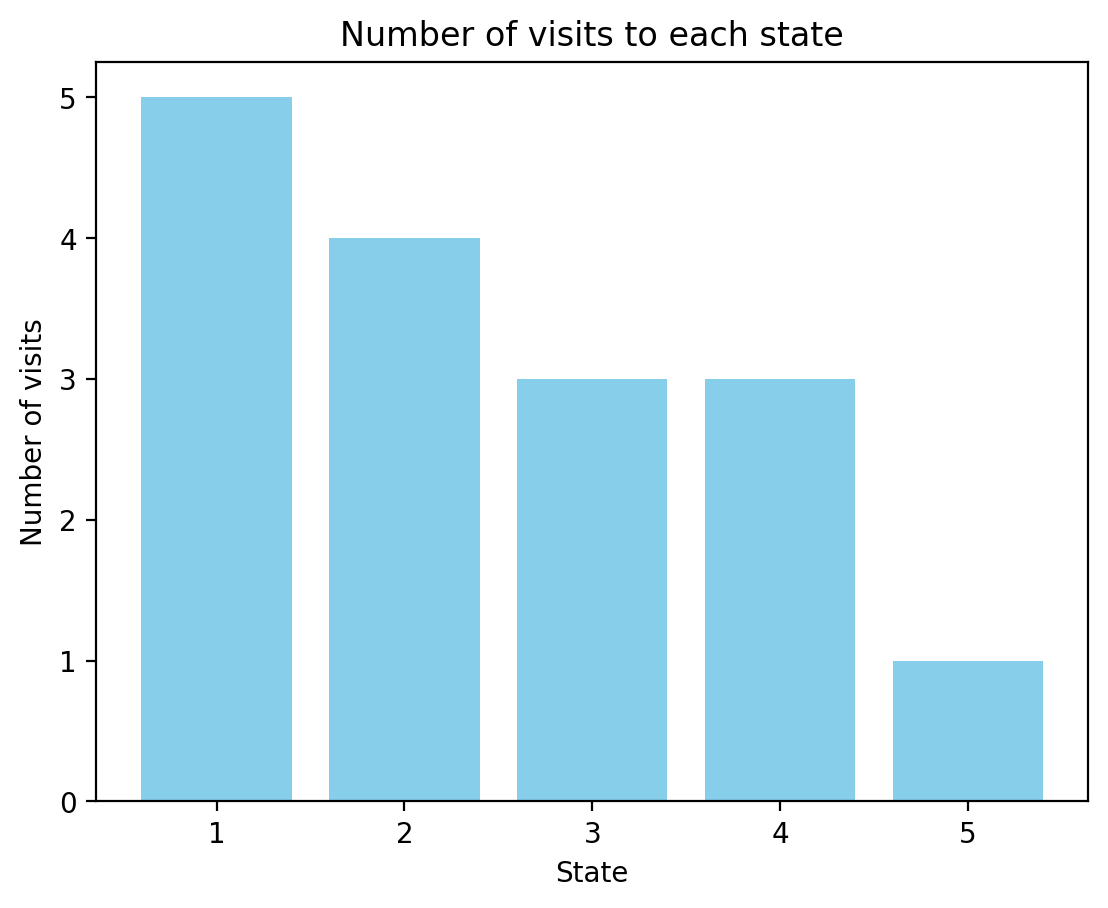

In [8]:
def plot_state_visits(visits):
    plt.bar(states, visits, color="skyblue")
    plt.xlabel("State")
    plt.ylabel("Number of visits")
    plt.title("Number of visits to each state")
    plt.show()


plot_state_visits(visits)

Then, we can visualize the history of states visited by the agent during the simulation and the cumulative reward obtained at each time step.

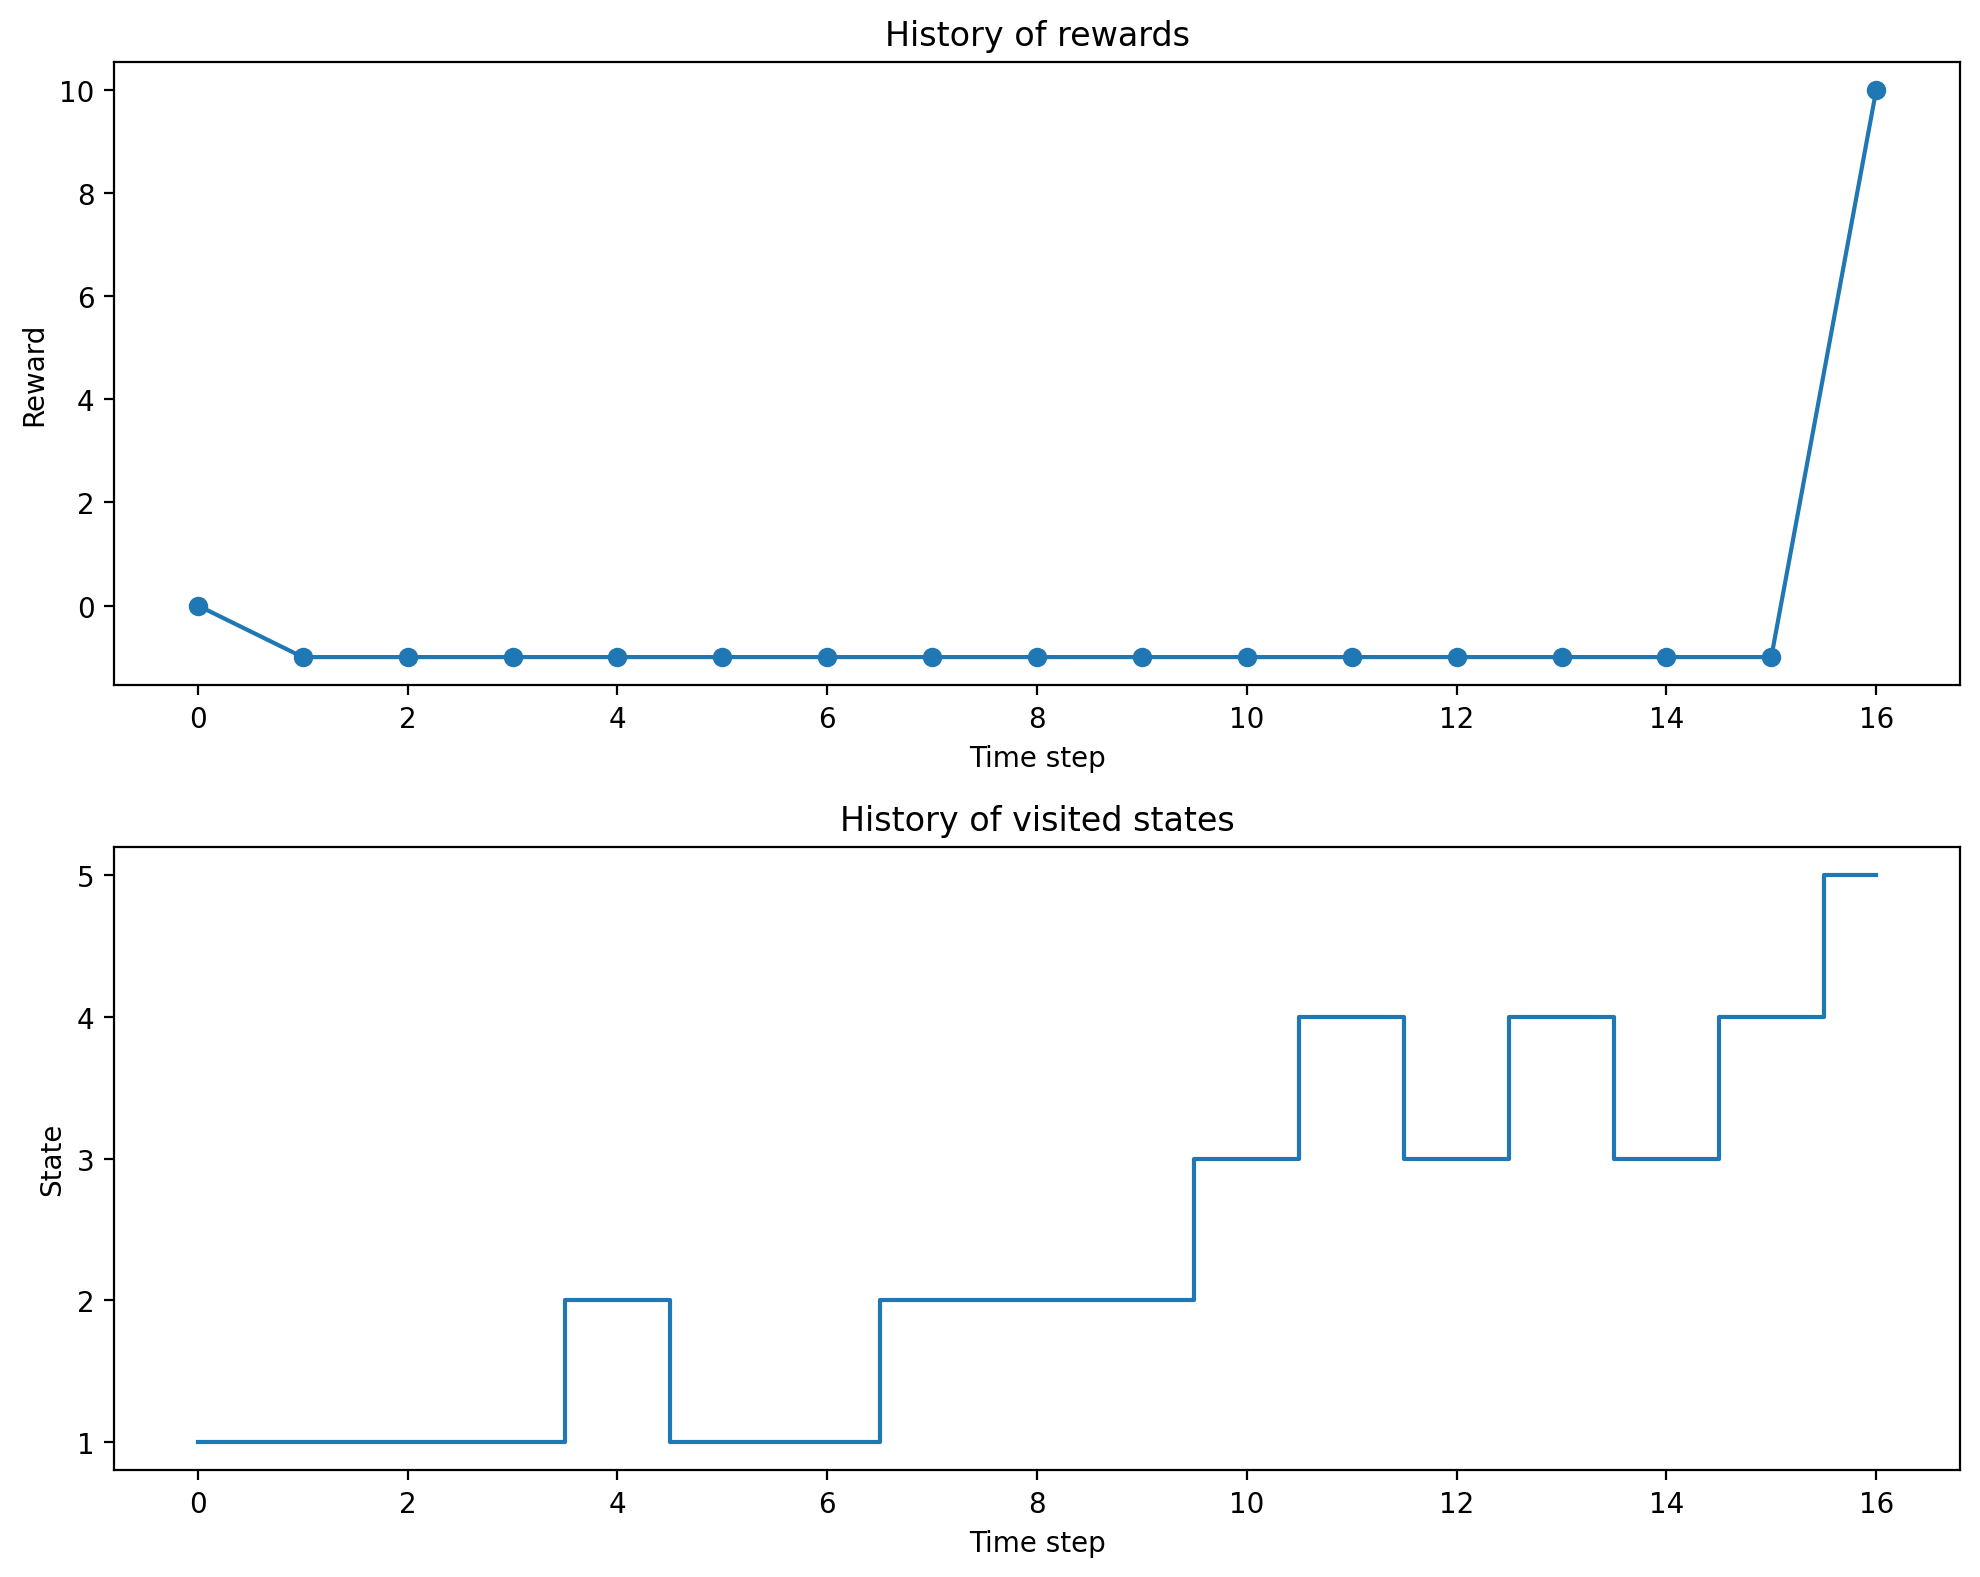

In [9]:
def plot_history(reward_history):
    # Make subplot for reward history and visited states
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(reward_history, marker="o")
    ax[0].set_xlabel("Time step")
    ax[0].set_ylabel("Reward")
    ax[0].set_title("History of rewards")
    ax[1].step(np.arange(len(visited_history)), visited_history, where="mid")
    ax[1].set_xlabel("Time step")
    ax[1].set_ylabel("State")
    ax[1].set_yticks(states)
    ax[1].set_title("History of visited states")
    plt.tight_layout()
    plt.show()


plot_history(reward_history)

Now that we've set up a basic MDP, let's take this one step further: let's implement this in 2D space for a robot navigating a grid world.

## Task 2: MDPs on a Grid World using Gymnasium

In this task, we will develop a Q-learning algorithm to solve a maze using the `gymnasium` library. We'll create a custom 2D grid environment with obstacles and learn to navigate through it using reinforcement learning.

Firstly, we import the necessary libraries and set up the environment.

In [10]:
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Then, we create a custom maze environment using gymnasium.

The maze environment is a 5x5 2D grid world with the following elements:
* The robot starts at the bottom-left corner (0, 0) and must reach the top-right corner (4, 4).
* There are obstacles, at the positions indicated in the code below.
* The robot can move in four directions: up, down, left, and right. This represents the action space, and the valid actions are represented by integers 0, 1, 2, and 3, respectively.
* We assume that the robot can observe everything in the environment (i.e. it knows where each obstacle is, and where the goal is located).
* The task is to find the shortest path from the start to the goal while avoiding obstacles.

Read the code below to understand the setup of the environment.

In [11]:
from src.maze_env import MazeEnv

# Instantiate the environment
env = MazeEnv()

Remember that each state is represented by a tuple of two integers $(x, y)$, which describe the coordinates of the robot. The action space is represented by integers 0, 1, 2, and 3, corresponding to moving up, down, left, and right, respectively.

Next, we can define a **policy**, which is a function that maps states to actions. Before we try to find the best policy, let's implement a few example policies and observe how they perform in the maze environment.

### Task: Implement the Random Policy
Fill in the `random_policy` function below. This policy should choose a random action at each state.

In [12]:
# Define a random policy for the agent
def random_policy(state):
    return env.action_space.sample()

### Task: Implement a slightly more sophisticated policy

Consider this policy:

* If the $y$-coordinate of the robot is less than the 3, move down with a probability of 0.3 and move up with a probability of 0.7
* Otherwise, move right with a probability of 0.7 and move left with a probability of 0.3

Fill in the `new_policy` function below to implement this policy.

In [13]:
from src.mdp import new_policy

action = new_policy([0, 0])
action

0

### Task: Simulating the MDP

Complete the function below to simulate the MDP for a given policy. The function should return the path taken by the robot and the total reward obtained.

In [14]:
from src.mdp import simulate_maze_env


# Run the simulation
path, total_reward = simulate_maze_env(env, new_policy, num_steps=20)
print("Path taken:", path)
print("Total reward accumulated:", total_reward)

Path taken: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 3), (1, 3), (2, 3), (2, 3), (2, 3), (1, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (1, 3), (0, 3), (1, 3), (2, 3), (2, 3), (2, 3)]
Total reward accumulated: -0.20000000000000004


Run the code below to generate a .gif file showing the path taken by the robot in the maze environment.

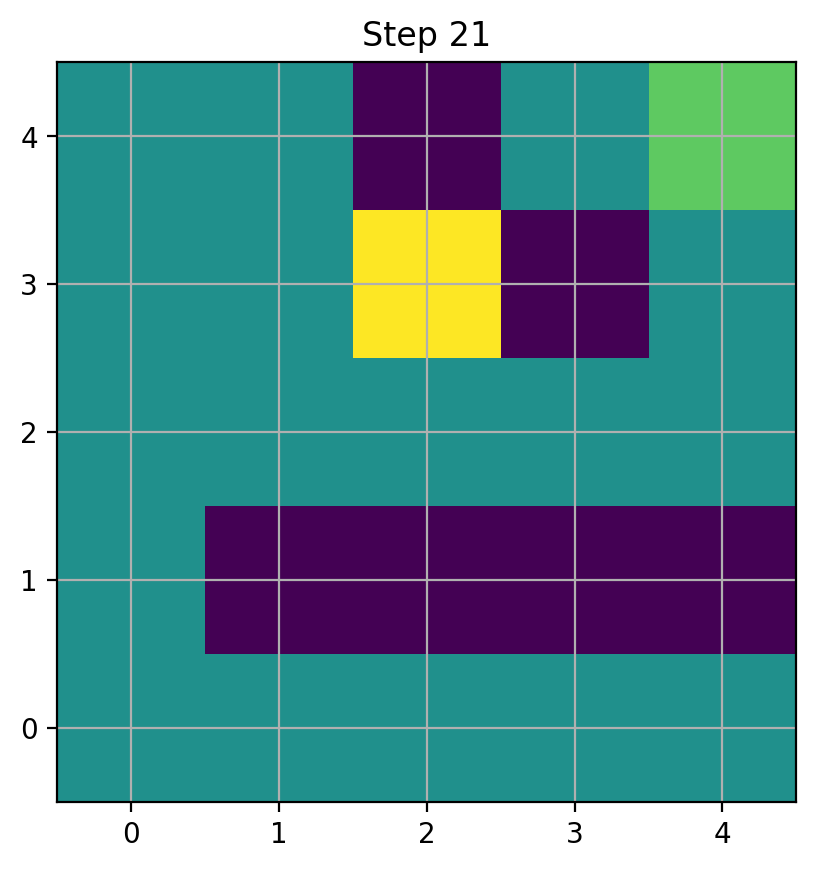

In [15]:
def visualize_history(env, path):
    grid = np.zeros((env.size, env.size))
    for obs in env.obstacles:
        grid[obs] = -1  # Represent obstacles
    grid[env.goal] = 0.5  # Represent goal

    fig, ax = plt.subplots()

    def update_frame(i):
        ax.clear()
        step = path[i]
        grid[step] = 1
        if i > 0 and step != path[i - 1]:
            grid[path[i - 1]] = 0
        ax.imshow(grid.T, cmap="viridis", origin="lower")
        ax.set_title(f"Step {i+1}")
        ax.grid("on")

    anim = animation.FuncAnimation(fig, update_frame, frames=len(path), interval=1000)
    anim.save("mdp.gif", writer="pillow")


# Call the visualize_history function
visualize_history(env, path)

The .gif can be visualized in the output cell below.

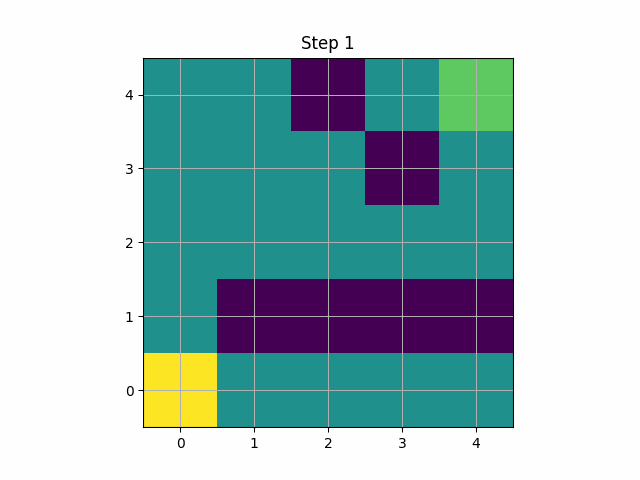

In [16]:
# Display the GIF
from IPython.display import Image

Image(filename="mdp.gif")

## Q-Learning

So far, we've just tried out some simple policies in the maze environment, but we haven't yet found the optimal policy. This is where Q-learning comes in.

Q-learning is a popular model-free reinforcement learning algorithm that is used to find the optimal action-selection policy using a Q-function. Unlike some reinforcement learning methods, Q-learning can compare the expected utility of the available actions without requiring a model of the environment. Q-learning works by learning an action-value function that ultimately gives the expected utility of taking a given action in a given state and following the optimal policy thereafter. The steps involved in Q-learning are as follows:

1. **Initialize the Q-values**: Q-values are initialized to zero (or any arbitrary value), and they represent the expected rewards for actions taken in given states.

2. **Choose an action**: Depending on the current state, an action is selected by following an epsilon-greedy strategy, which involves choosing the best action most of the time but selecting a random action occasionally to explore the efficacy of other actions.

3. **Perform the action and observe the reward**: After performing the action, the agent observes the reward and the new state.

4. **Update the Q-value**: The Q-value of the previous state and action is updated using the reward received and the maximum predicted Q-value of the new state. This update is done using the Q-learning formula, which incorporates the learning rate, the discount factor, and the reward.

5. **Repeat**: This process is repeated for each episode or until the learning is stopped.

### Mathematical Formulation

The Q-value update rule is as follows:
$$Q(s, a) \leftarrow Q(s, a) + \alpha \left[ R + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]$$
where:
- $Q(s, a)$ is the current Q-value of state $s$ and action $a$.
- $\alpha$ is the learning rate, $\alpha > 0$.
- $R(s,a)$ is the reward received after taking action $a$ in state $s$.
- $\gamma$ is the discount factor $0 \leq  \gamma  \leq 1$, which determines the importance of future rewards.
- $\max_{a'} Q(s', a')$ is the maximum predicted Q-value in the new state $s'$, over all possible actions $a'$.

This update rule helps the agent learn the expected reward for taking an action in a given state, and it converges to the optimal action-value function as the agent continues to learn.

Now, let's implement the Q-learning algorithm. Since the state space and action space are discrete, we can represent the Q-values as a table, where for every state-action pair, we have a corresponding Q-value.

### Task: Implement the Q-Learning Algorithm

Fill in the `q_learning` function below to implement the Q-learning algorithm. The function should return the Q-table learned by the agent.

In [17]:
from src.mdp import q_learning

# Train the Q-learning model
q_table = q_learning(env)

We can then visualize the optimal policy for each state in the maze environment. This is done by selecting the action with the highest Q-value at each state.

Recall that:
* 0 represents moving up
* 1 represents moving down
* 2 represents moving left
* 3 represents moving right

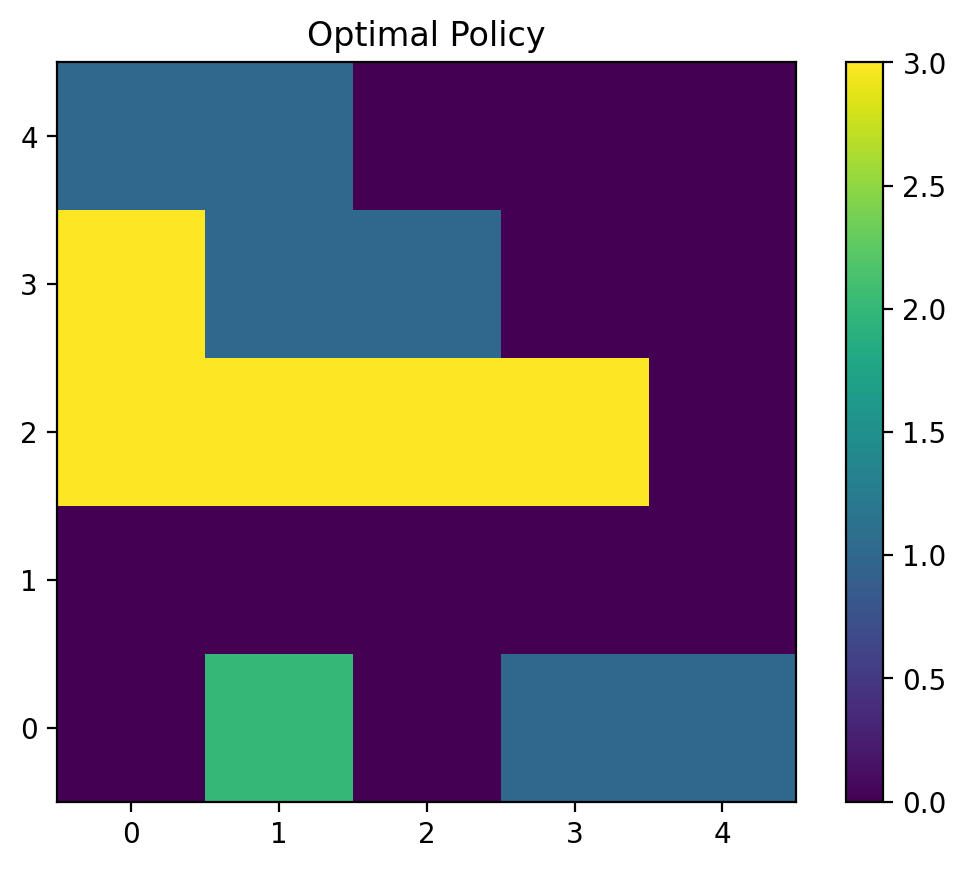

In [18]:
# Visualize the optimal policy from the Q-table
def visualize_policy(q_table):
    policy = np.argmax(q_table, axis=2)
    plt.imshow(policy.T, origin="lower")
    plt.colorbar()
    plt.title("Optimal Policy")
    plt.show()


visualize_policy(q_table)

## Visualize Maze Navigation

Finally, let's simulate the agent navigating the maze with the learned Q-table and visualize the process. This code will generate a .gif file, which will be saved in `mdp_q_learning.gif`.

Path taken: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)] 
 Done: True


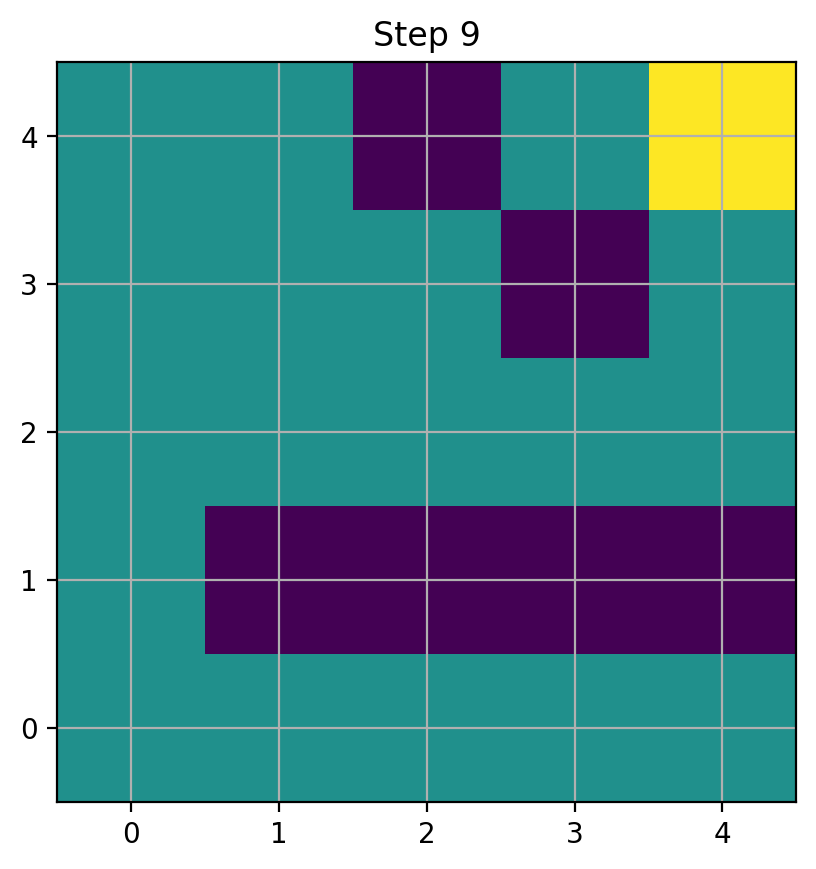

In [19]:
from src.mdp import simulate_maze_env_q_learning


# Call the simulate function
states, done = simulate_maze_env_q_learning(env, q_table)
print(f"Path taken: {states} \n Done: {done}")

The resulting .gif file can be visualized in the output cell below.

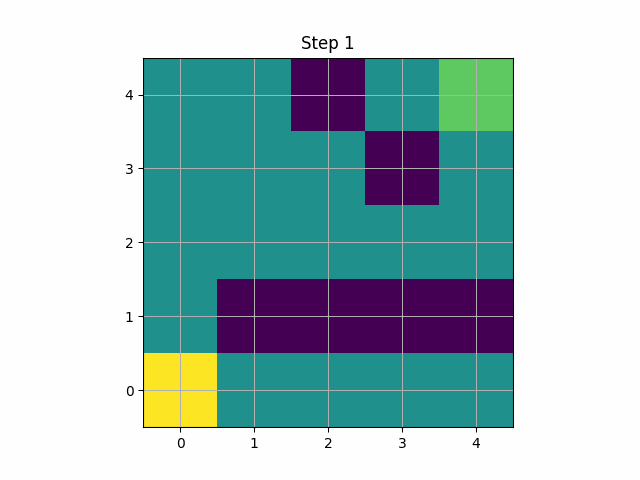

In [20]:
# Display the GIF
Image(filename="mdp_q_learning.gif")

To verify that you implemented the Q-learning algorithm correctly, you can check that the robot reaches the goal following an efficient trajectory that avoids obstacles.

## Submission

Please submit your completed notebook `MDP.ipynb` to Gradescope, along with the gifs `mdp.gif` and `mdp_q_learning.gif` generated. Additionally, you need to submit `maze_env.py` and `mdp.py` to Gradescope.

Good luck!